Oleh Roikhatul Miskiyah - PYTN-KS05-010 - Batch 5

# Classification 1

# Logistic Regression in Python

## Logistic Regression in Python With scikit-learn: Example 1

In [1]:
# Step 1: Import Packages, Functions, and Classes

# Pertama, kita harus mengimpor Matplotlib untuk visualisasi dan NumPy untuk operasi array. Kita juga akan memerlukan LogisticRegression, classification_report(), dan confusion_matrix() dari scikit-learn:


import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Step 2: Get Data In practice, you’ll usually have some data to work with. For the purpose of this example, let’s just create arrays for the input (𝑥) and output (𝑦) values:

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [5]:
# Step 3: Create a Model and Train It

# Setelah kita menyiapkan input dan output, kita dapat membuat dan menentukan model klasifikasi. Kita akan membuatnya dengan instance kelas LogisticRegression:

model = LogisticRegression(solver='liblinear', random_state=0)


In [6]:
model.fit(x, y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(random_state=0, solver='liblinear')

In [7]:
# Pernyataan diatas sama dengan dibawah ini.

model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)


In [8]:
#Kita bisa dengan cepat mendapatkan atribut model kita. Misalnya, atribut .classes_ mewakili array nilai berbeda yang diambil y:

model.classes_

array([0, 1])

In [9]:
# Kita juga bisa mendapatkan nilai slope 𝑏₁ dan titik intercept 𝑏₀ dari linear function 𝑓 seperti ini:

print(model.intercept_, model.coef_)


[-1.04608067] [[0.51491375]]


In [10]:
# Step 4: Evaluate the Model

# Setelah model ditentukan, kita dapat memeriksa performanya dengan .predict_proba(), yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol atau satu:

model.predict_proba(x)


array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [11]:
# Kita bisa mendapatkan prediksi aktual, berdasarkan matriks probabilitas dan nilai 𝑝(𝑥), dengan .predict():

model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# Jika kita memiliki sembilan dari sepuluh observasi yang diklasifikasikan dengan benar, akurasi model kita sama dengan 9/10 = 0,9, yang dapat kita peroleh dengan .score():

model.score(x, y)

0.9

In [13]:
# Untuk membuat confusion matrix, kita bisa menggunakan confusion_matrix() dan memberikan actual dan predicted outputs sebagai argumen:

confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

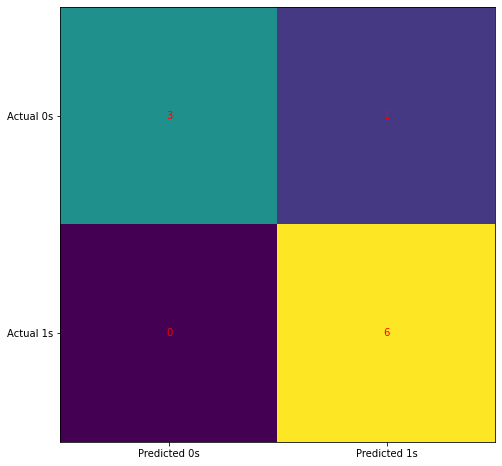

In [14]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [15]:
# Kita bisa mendapatkan laporan yang lebih komprehensif tentang klasifikasi dengan classification_report():

print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [16]:
# Kita dapat meningkatkan model  dengan mengatur parameter yang berbeda. Misalnya, mari bekerja dengan regularization strength C sama dengan 10,0, daripada nilai default 1,0:

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)


LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [17]:
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [18]:
print(model.intercept_, model.coef_)


[-3.51335372] [[1.12066084]]


In [19]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [20]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [21]:
model.score(x, y)

1.0

In [22]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [23]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Logistic Regression in Python: Handwriting Recognition

In [24]:
#Step 1: Import Packages

# Kita perlu mengimpor Matplotlib, NumPy, dan beberapa fungsi dan kelas dari scikit-learn:


import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [25]:
# Step 2a: Get Data

# Kita bisa mengambil dataset langsung dari scikit-learn dengan load_digits(). Ini mengembalikan tuple input dan output:

x, y = load_digits(return_X_y=True)
print(x)
print(y)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [27]:
# Step 2b: Split Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
# Step 2c: Scale Data

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [30]:
# Step 3: Create a Model and Train It

In [31]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [32]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [36]:
# Step 4: Evaluate the Model
x_test = scaler.transform(x_test)

# Kita bisa mendapatkan predicted outputs dengan .predict():
y_pred = model.predict(x_test)

# mendapatkan akurasi dengan .score():

model.score(x_train, y_train)

0.964509394572025

In [37]:
model.score(x_test, y_test)

0.14166666666666666

In [38]:
# mendapatkan confusion matrix dengan confusion_matrix():

confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  0,  0,  0, 27,  0,  0],
       [ 0,  5,  0,  0,  1,  0,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  1,  0],
       [ 0,  0,  0,  0,  4,  2,  0, 24,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 39,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0]], dtype=int64)

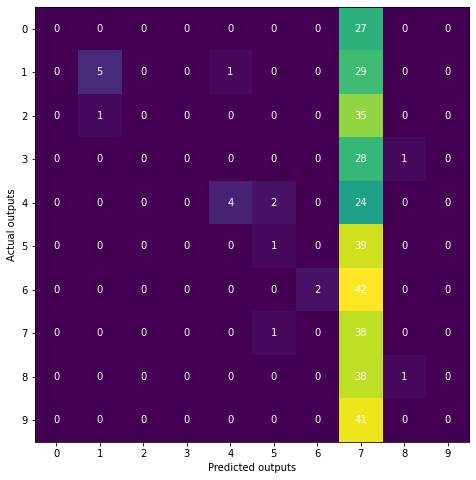

In [39]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [40]:
# mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.83      0.14      0.24        35
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        29
           4       0.80      0.13      0.23        30
           5       0.25      0.03      0.05        40
           6       1.00      0.05      0.09        44
           7       0.11      0.97      0.20        39
           8       0.50      0.03      0.05        39
           9       0.00      0.00      0.00        41

    accuracy                           0.14       360
   macro avg       0.35      0.13      0.09       360
weighted avg       0.36      0.14      0.09       360



C:\Users\miskiyahr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN in Python With scikit-learn: Example 1

In [41]:
# Defining Dataset
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [42]:
# Encoding data columns

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [43]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [44]:
# Combining Features
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [45]:
# Generating Model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted = model.predict([[0,2]]) # 0:Overcast, 2:Mild

print(predicted)

[1]


# KNN in Python With scikit-learn: KNN with Multiple Labels

In [46]:
# Loading data
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [47]:
# Exploring Data
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [48]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [49]:
# periksa 5 record teratas dari set feature.

print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [50]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [51]:
# memeriksa bentuk kumpulan data menggunakan shape.

# print data(feature)shape
print(wine.data.shape)

(178, 13)


In [52]:
# print target(or label)shape
print(wine.target.shape)

(178,)


In [53]:
# Splitting Data
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

In [54]:
# Generating Model for K=5
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [55]:
# Model Evaluation for k=5
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [56]:
# Re-generating Model for K=7
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


In [59]:
# improve model dan mencari tahu nilai k yang optimal.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error mean')

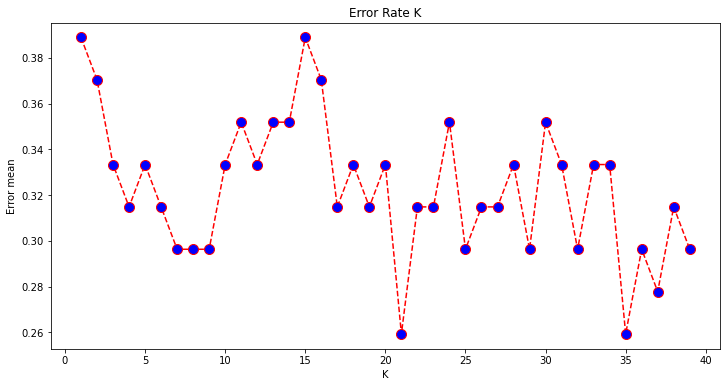

In [61]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [62]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=25)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


                        -- Selesai --